In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [206]:
matches = pd.read_csv('WorldCupMatches.csv')
print(matches.head())
print(matches.info())

     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0

In [207]:
matches.dropna(subset=["Year"], inplace=True)

In [208]:
matches['Year'] = matches['Year'].astype(int)

In [209]:
matches['Total Goals'] = matches['Home Team Goals'] + matches['Away Team Goals']

TypeError: 'list' object is not callable

<Figure size 432x288 with 0 Axes>

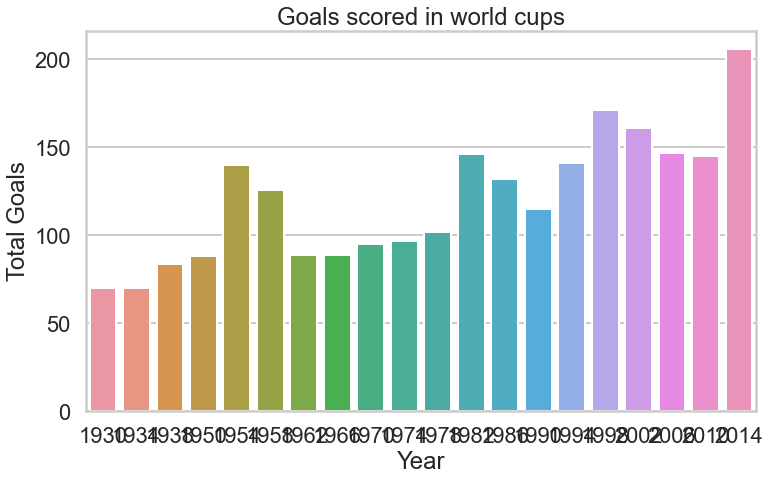

In [210]:
plt.clf()
sns.set_style('whitegrid')
sns.set_context('poster')

f, ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(data = matches, x="Year", y="Total Goals", estimator=sum, ci=None)
ax.set_title('Goals scored in world cups')
plt.xticks(rotation=90)
plt.plot()

TypeError: 'list' object is not callable

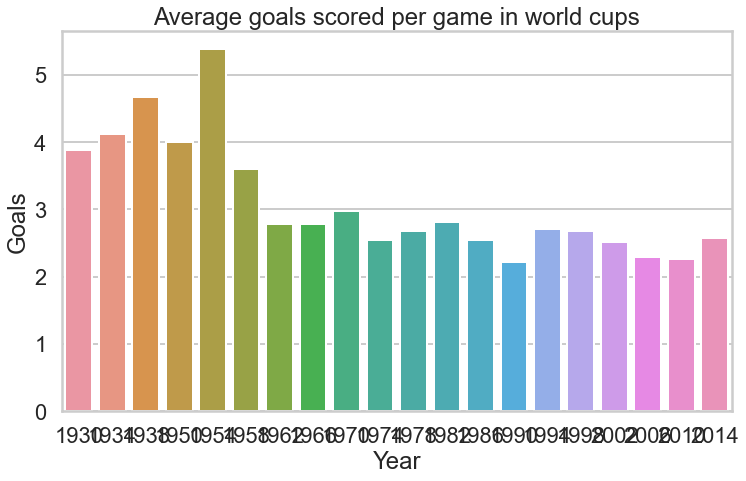

In [211]:
sns.set_style('whitegrid')
sns.set_context('poster')

f, ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(data = matches, x="Year", y="Total Goals", estimator=np.average, ci=None)
ax.set_title('Average goals scored per game in world cups')
plt.ylabel('Goals')
plt.xticks(rotation=90)
plt.plot()

In [ ]:
players = pd.read_csv('WorldCupPlayers.csv')
print(players.head())
print(players.info())

In [212]:
players.dropna(subset=["RoundID"], inplace=True)

In [213]:
players['Goals'] = players['Event'].str.count('G')

In [214]:
import matplotlib.pyplot as plt
goals = players[(players['Goals'].notna()) & (players['Goals'] > 0)]
goals = goals.groupby(['Team Initials','Player Name']).sum()
goals = goals.sort_values(by=['Goals'], ascending=False).reset_index()
goals = goals[['Player Name', 'Goals']]

goals = goals.replace(to_replace = r'[^a-zA-Z]', value=r' ', regex=True)

goals = goals.head(20)
goals

,Player Name,Goals
0,KLOSE,17.0
1,RONALDO,14.0
2,Just FONTAINE,13.0
3,Gerd MUELLER,13.0
4,PEL Edson Arantes do Nascimento,12.0
5,Sandor KOCSIS,11.0
6,M LLER,11.0
7,Grzegorz LATO,10.0
8,Helmut RAHN,10.0
9,Uwe SEELER,9.0


TypeError: 'list' object is not callable

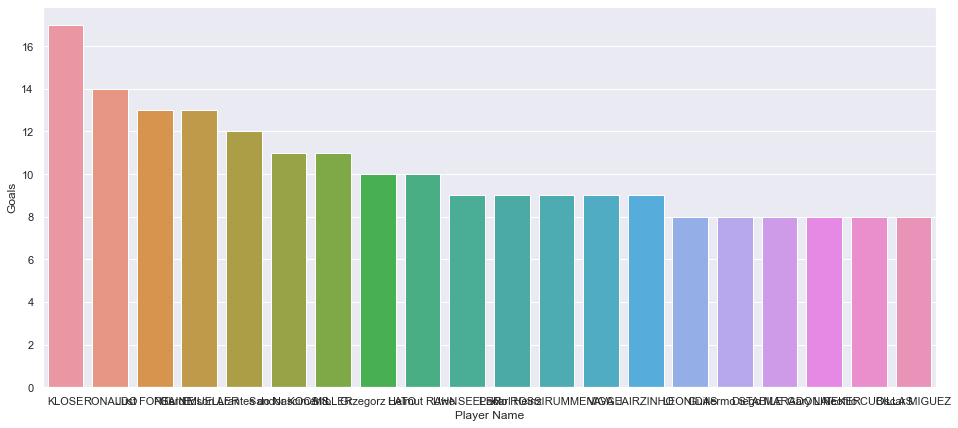

In [217]:
sns.set_theme()
f, ax = plt.subplots(figsize=(16,7))

sns.barplot(x='Player Name', y='Goals', data = goals)
plt.xticks(rotation=90)

In [ ]:
cups = pd.read_csv('WorldCups.csv')
print(cups.head())
cups.info()